## Download data

On LinkedIn, in the option ["Settings and Privacy"](https://www.linkedin.com/psettings/member-data) we download a copy of the data, selecting the "Contacts" data. In a few minutes we will receive an email with the link to download the csv file with our data.

In this notebook, I modified the downloaded file  removing the last names and emails of the contacts before uploading.

## Loading the data

We load the data into a Data Frame. These are the first records

In [14]:
#Importamos las librerías que usaremos en el proyecto
import pandas as pd
import plotly.express as px
from itertools import combinations
from collections import Counter
import plotly.graph_objects as go

In [15]:
#cargamos el fichero de conexiones a un dataframe
projects = pd.read_csv('data/projects.csv')



#mostramos los primeros registros
#df.head(10)

In [16]:
#descripción del dataframe
#df.describe()

In [17]:
#para trabajar correctamente transformamos el campo Connected On en un campo fecha
projects['Date'] = pd.to_datetime(projects['Date'])

In [18]:
# añadimos una columna Año-Mes para hacer agrupaciones por mes del contacto
projects['mes_año'] = pd.to_datetime(projects['Date']).dt.to_period('M').astype(str)

## Visualizations using plotty xpress

We are going to show several graphs to analyze the LinkedIn connections.

### 1. View connections by date

We start with a basic graph with the connections by date

In [19]:
#visualizamos las conexiones por fecha
fig1 = px.line(projects.groupby(by="Date").count().reset_index(), x="Date", y="ProjectName", 
               labels={"Nombre de Proyecto":"Nº de proyectos"},
               template="plotly_dark",
               title="Número de proyectos por fecha")
fig1.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
        ]),
        bgcolor="#ff0000"
    )
)
fig1.show()

Now we are going to use the histogram, and we will customize the graph, adding buttons and slider to improve the visualization in such a long period. We also do the grouping per month, not per day

In [20]:
fig2 = px.histogram(projects, x="Date", y="ProjectName", histfunc="count", title="Histograma", 
                    template="plotly_dark")
fig2.update_traces(xbins_size="M1")
fig2.update_layout(bargap=0.1)
fig2.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
        ]),
        bgcolor="#ff0000"
    )
)
fig2.show()

Now we show it again, but with data accumulated by date

In [21]:
fig3 = px.histogram(projects, x="Date", y="ProjectName", histfunc="count", title="Histograma", cumulative=True,
                    template="plotly_dark")
fig3.update_traces(xbins_size="M1")
fig3.update_layout(bargap=0.1)
fig3.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
        ]),
        bgcolor="#ff0000"
    )
)
fig3.show()

Now we add a bar graph, also customized with buttons to select the date range

In [26]:
count = Counter()
for row in projects['Languages']:
    try:
        row_list = row.split(";")
    except:
        pass
    count.update(Counter(combinations(row_list, 1)))
dic = dict()    
for key,value in count.most_common(10):
    dic[key[0]] = value
most_used = pd.DataFrame()
most_used["Language"] = dic.keys()
most_used["Count"] = dic.values()
most_used["Count %"] = most_used["Count"].apply(lambda x: (x*100)/projects.shape[0])

most_suggested = pd.DataFrame(projects['Languages'].value_counts())
most_suggested.reset_index(inplace=True)
most_suggested.columns = ["Language", "Count"]
most_suggested = most_suggested[most_suggested["Language"]!="Not Specified"]
most_suggested.reset_index(inplace=True)
most_suggested["Count %"] = most_suggested["Count"].apply(lambda x: (x*100)/projects.shape[0])


lang = pd.merge(most_used, most_suggested, on="Language")
lang.drop(columns=["Count_x", "index", "Count_y"], inplace=True)
lang.columns=["Language", "Count % for most used language", "Count % for most suggested language"]

fig = go.Figure()
fig.add_trace(go.Bar(x=lang['Language'],
                y=lang['Count % for most used language'],
                name='Most Used Programming Language',
                marker_color='rgb(55, 83, 109)'
                ))

fig.update_layout(
    title = "Popular Programming Languages",
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Count %',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0.6,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)',
        
    ),
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.1,
    title_x=0.5,
    autosize = True,
)
fig.show()

### 2. View contacts by company

We are going to show the contacts by current company, and we will do it with two types of graphs

In [ ]:
# En primer lugar agrupamos la información por compañía y ordenamos

In [ ]:
df_by_company = df.groupby(by="Company").count().reset_index().sort_values(by="ProjectName", ascending=False).reset_index(drop=True)

The first chart to display is a bar chart of the top 20 companies. 

And to see another visualization that can provide another vision, we are going to use the Treemap graphic

In [ ]:
fig6 = px.treemap(df_by_company[:100], path=["Company"], values="ProjectName", hover_data=["Company","ProjectName"], 
                  color="ProjectName", 
                  template="plotly_dark",
                   labels={"ProjectName":"Nº de Contactos", "Company":"Empresa"})
fig6.show()

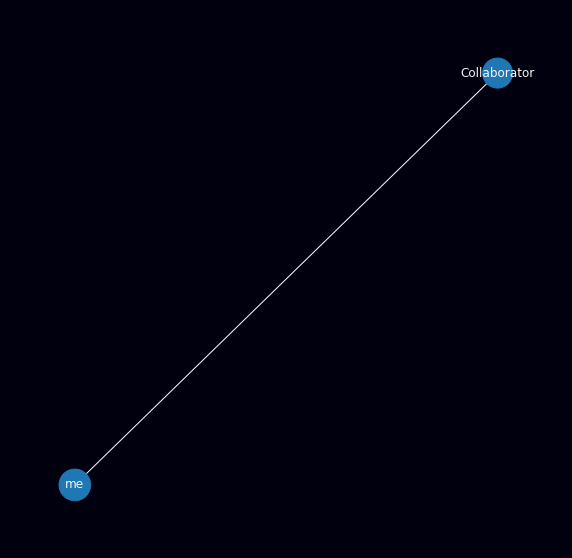

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
from pyvis import network as net

# initialize graph
G=nx.Graph()



df_company = df["Company"].value_counts().reset_index()
df_company.columns = ["Company", "Count"]
df_company = df_company.sort_values(by="Count", ascending=False)
df_company.head(10)

G.add_node('me', color='red',size=1000, font_color='white') # intialize yourself as central
df_company_reduced = df_company.loc[df_company['Count']>=3]
df_company_reduced.head()

# use iterrows tp iterate through the data frame
for _, row in df_company_reduced.iterrows():

  # store company name and count
  company = row['Company']
  count = row['Count']

 #print('Loading ',company, ' with ', count, 'edges')# Print graph

  title = f"<b>{company}</b> – {count}"
  positions = set([x for x in df[company == df['Company']]['Position']])
  positions = ''.join('<li>{}</li>'.format(x) for x in positions)

  position_list = f"<ul>{positions}</ul>"
  hover_info = title + position_list

  G.add_node(company,color='red',size=count*300, title=hover_info)

  G.add_edge('me', company, color='grey')


node_color=[]
node_size=[]
for node in G.nodes():
    color = G.nodes[node]['color']
    node_color.append(color)
    size = G.nodes[node]['size']
    node_size.append(size)

#Draw the network digram assigning node_color and node_size using the lists established in the previous step and lavish in your new found network diagram greatness.
fig = plt.figure(figsize=(10,10))
plt.margins(x=0.1, y=0.1)
nx.draw(G, with_labels=True, node_size=node_size, edge_color='white', font_size=12, font_color="whitesmoke")
fig.set_facecolor("#00000F")

### 3. Job analysis

Now we do an analysis of the positions of all the contacts

In [ ]:
# agrupamos por puesto
df_by_position = df.groupby(by="Position").count().reset_index().sort_values(by="ProjectName", ascending=False).reset_index(drop=True)


and now we show the information in graphs. First the bar chart:

In [ ]:
#creamos el gráfico de barras y lo mostramos
fig7 = px.bar(df_by_position[:20],
              x="Position", y="ProjectName", 
              labels={"ProjectName":"Nº de Contactos", "Position":"Puesto"},
              template="plotly_dark", 
              text='ProjectName',
              hover_data=["Position", "ProjectName"], color="ProjectName",title="Contactos por puesto")

fig7.update_layout(xaxis_tickangle=-45, 
                  yaxis={'visible': True, 'showticklabels': True, 'showgrid': True},
                  font=dict(size=13),
                 )
fig7.show()

And now we show a TreeMap that gives us another view of the same data

In [ ]:
fig8 = px.treemap(df_by_position[:100], path=["JobTitle"], values="ProjectName",
                  hover_data=["JobTitle", "ProjectName"], color="ProjectName",
                  template="plotly_dark", 
                  labels={"JobTitle":"Nº de contactos"}, title="Mapa de contactos por posición")
fig8.show()

ZeroDivisionError: Weights sum to zero, can't be normalized

### 4. Analysis of contact Companies

We will do an analysis of the Companies of the LinkedIn contacts showing them in a TreeMap

In [ ]:
#agrupamos y ordenamos
df_by_Name = df.groupby(by="Company").count().sort_values(by="Position", ascending=False).reset_index()


In [ ]:
#Mostramos un TreeMap con los nombres
fig9 = px.treemap(df_by_Name[:100], path=["Company"], values="Position", hover_data=["Company", "Position"], template="plotly_dark",color="Company", labels={"Company":"Nº de puestos"}, title="Empresas por Puestos")
fig9.show()

### 5. Word cloud

We will do a graphic analysis by words

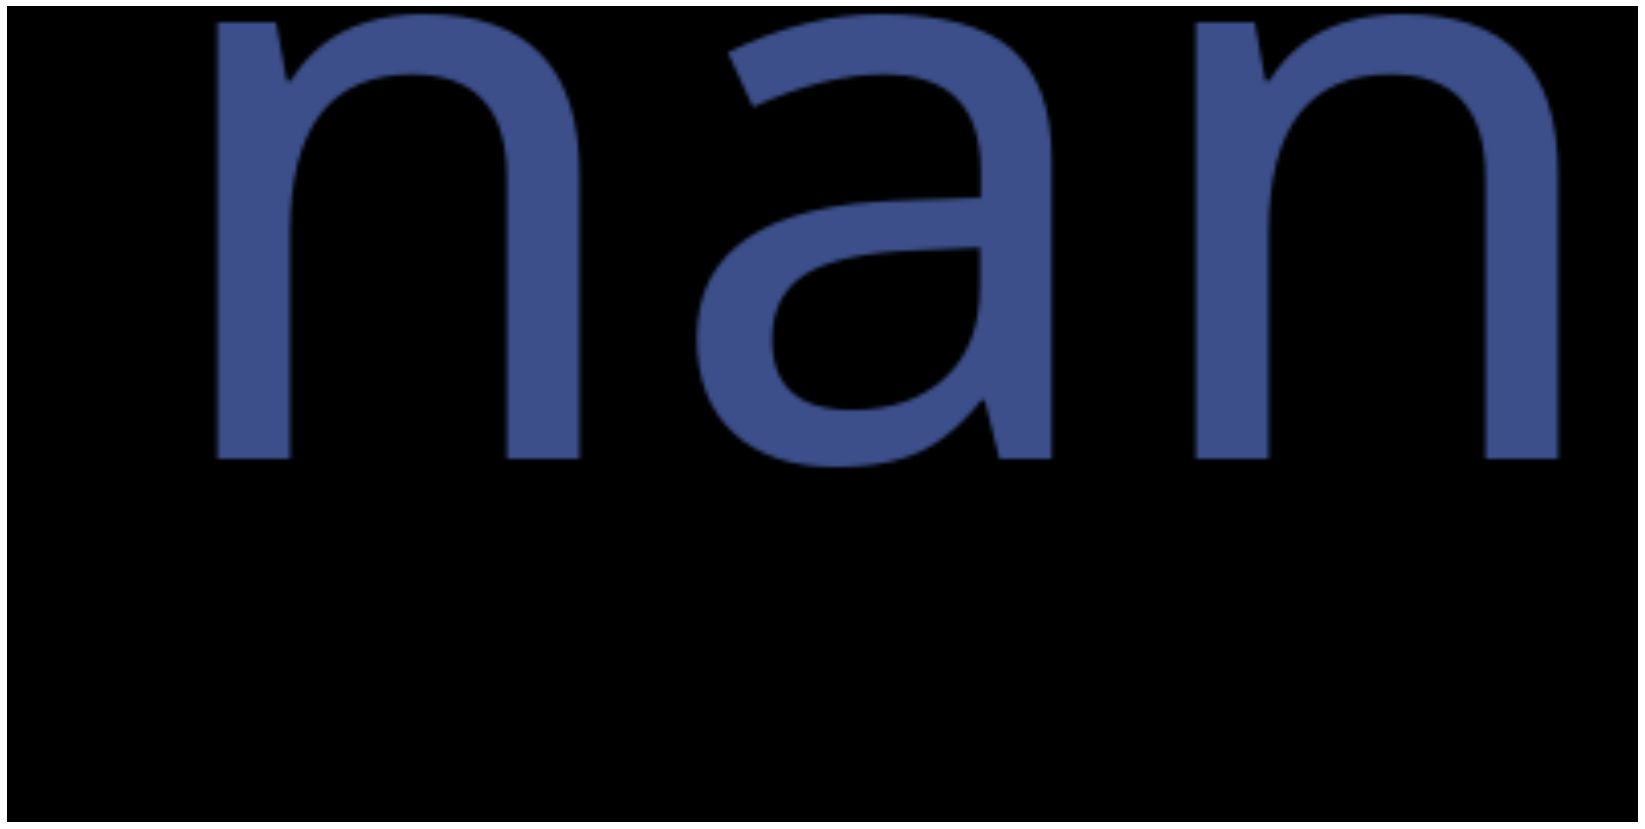

In [ ]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt #Import matplotlib library 
import seaborn as sns


text = ' '.join(map(str, df['Position'].values)) 

# stopwords = ['Inc', 'Global', 'Ltd', 'Self', 'Services', 'hiring', 'Club', 'Training', 'Technologies', 'Pvt', 'Limited', 'Project', 'Career', 'Education', 'Solutions', 'LLC', 'Private', 'College', 'Wholesale', 'University', 'India', 'Group']
wrd = WordCloud(background_color='black', margin=0, collocations=False)

# for sw in stopwords:
#     wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

plt.figure(figsize=(30,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Made with ❤️ by [Iñigo Jiménez](https://www.linkedin.com/in/inigojimenez) based on the project by [Sergio Pereira](https://www.linkedin.com/in/sergiopereiralema)